In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [191]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [192]:
# 设置绘图风格
plt.style.use('seaborn')

# 解决中文乱码等问题
plt.rcParams["font.sans-serif"] = ["SIMHEI"]
plt.rcParams["axes.unicode_minus"] = False

In [193]:
df = pd.read_excel("谦璞多策略稳健一号基金净值20230820.xlsx")

# 将日期列转换为日期类型
df['日期'] = pd.to_datetime(df['日期'])
df.set_index("日期", inplace=True)

# 净值分类
jz_type = "复权净值"


In [194]:
# 计算成立以来收益率(每周)
df['成立以来收益率(每周)'] = (df[jz_type] - df[jz_type].iloc[-1]) / df[jz_type].iloc[-1]

# 计算成立以来年化收益率(每周)
def date_diff(last_date,first_date):
    return (last_date- first_date).days + 1
df['成立以来年化收益率(每周)'] = ((1 + df['成立以来收益率(每周)']) ** (365 / date_diff(df.index, df.index[-1]))) - 1


# 计算每周的动态回撤值
df['动态回撤值'] = -(df[jz_type][::-1].cummax() - df[jz_type]) / df[jz_type][::-1].cummax()

# 计算最大回撤值
max_drawdown = df['动态回撤值'].max()


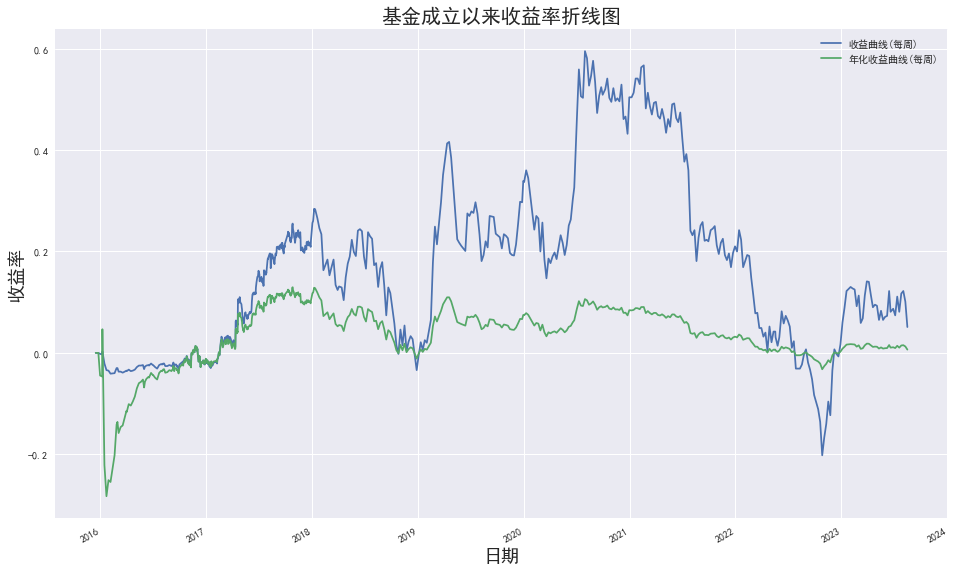

In [195]:
# 创建一个新的图形
plt.figure(figsize=(16, 10))

# 绘制成立以来收益率(每周)折线
plt.plot(df.index, df['成立以来收益率(每周)'], label='收益曲线(每周)')
plt.plot(df.index, df['成立以来年化收益率(每周)'], label='年化收益曲线(每周)')

# 添加标题和标签
plt.title('基金成立以来收益率折线图',fontsize = 20)
plt.xlabel('日期',fontsize = 18)
plt.ylabel('收益率',fontsize = 18)
plt.legend()

# 自动调整日期标签以避免重叠
plt.gcf().autofmt_xdate()

# 显示图例和图形
plt.show()


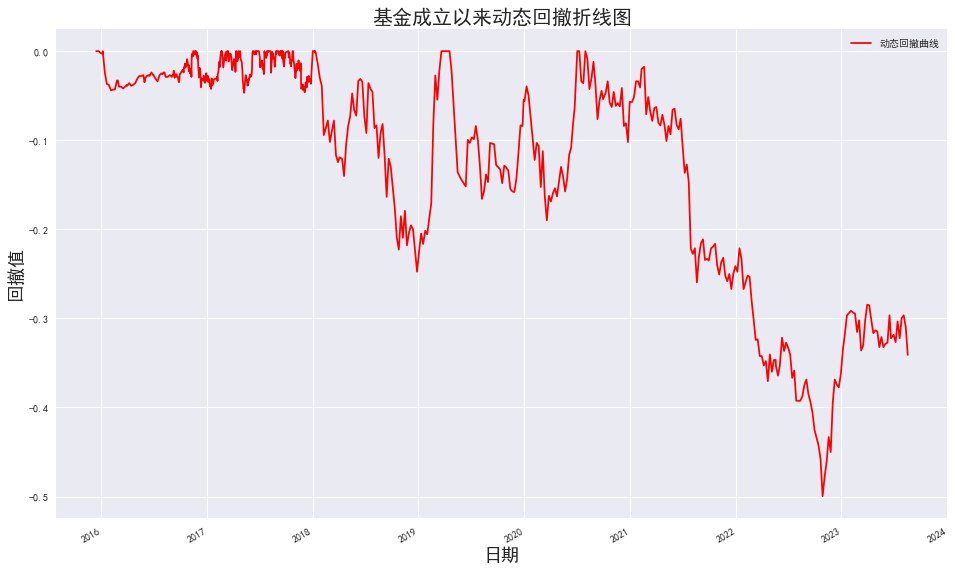

In [196]:
# 创建一个新的图形
plt.figure(figsize=(16, 10))

# 绘制成立以来收益率(每周)折线
plt.plot(df.index, df['动态回撤值'], label='动态回撤曲线', color = 'r')

# 添加标题和标签
plt.title('基金成立以来动态回撤折线图',fontsize = 20)
plt.xlabel('日期',fontsize = 18)
plt.ylabel('回撤值',fontsize = 18)
plt.legend()

# 自动调整日期标签以避免重叠
plt.gcf().autofmt_xdate()

# 显示图例和图形
plt.show()
